In [1]:
import torch as tr
import numpy as np

import itertools

from PM_models import *
from PM_tasks import *
from help_amtask import *

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
# loop params
wmsize = 4
nmaps = 4
switch = 1
ntrials = 2
seed = 1

# net params
emsetting = 1
instdim = 10
stimdim = 12
emk_weights = [1,.005]

# init
net = NetBarCode(
        wmsize=wmsize,
        emsetting=emsetting,
        seed=seed,
        instdim=instdim,
        stimdim=stimdim,
        init_emkw=emk_weights,
        debug=False
)
task = TaskArbitraryMaps(
          nmaps=nmaps,
          switchmaps=switch,
          ntokens_surplus=10,
          seed=seed,
          stimdim=stimdim
)

In [3]:
# train params
neps_tr = 20000
ntrials_tr,trlen_tr = 2,5
trsc = run_net(net,task,neps_tr,ntrials_tr,trlen_tr,training=True,verb=True,return_states=False)

0.0 0.0
0.2 0.8333333333333334
0.4 1.0
0.6 1.0
0.8 1.0


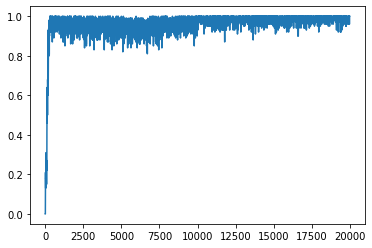

In [4]:
trac = trsc[:,:,nmaps:].mean((1,2))
plt.plot(mov_avg(trac,10))

In [34]:
nmaps_ev = nmaps-2
task.nmaps = nmaps_ev
neps_ev = 300
ntrials_ev,trlen_ev = 10,20
evsc = run_net(net,task,neps_ev,ntrials_ev,trlen_ev,training=False,verb=False,return_states=False)
evsc.shape

(300, 10, 22)

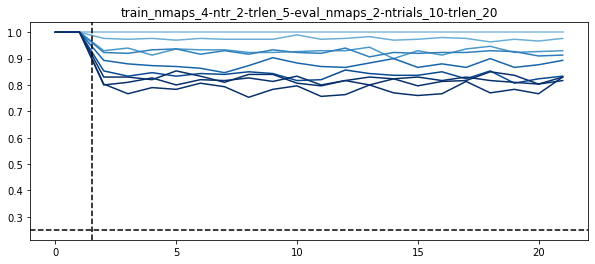

In [35]:
evac = evsc[:,:,:].mean(0)
plt.figure(figsize=(10,4))
for idx,ac in enumerate(evac):
  plt.plot(ac,c=plt.cm.Blues(.3+idx/len(evac)))
plt.axhline(1/nmaps,c='k',ls='--')
plt.axvline(nmaps_ev-.5,ls='--',c='k')
title = 'train_nmaps_%i-ntr_%i-trlen_%i-eval_nmaps_%i-ntrials_%i-trlen_%i'%(
        nmaps,ntrials_tr,trlen_tr,nmaps_ev,ntrials_ev,trlen_ev)
plt.title(title)
plt.savefig('figures/amtask_pieval/generalization/'+title)